In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Mục tiêu dự đoán giá Giá đóng cửa của cổ phiếu vào ngày đó.**

# 1.Chọn chủ đề 'Dự_ đoán_ giá_ cổ_ phiếu'


**tập dữ liệu này có 12 cột. Các cột bao gồm**

1.Date: Ngày của dữ liệu giá cổ phiếu.

2.Open: Giá mở cửa của cổ phiếu vào ngày đó.

3.High: Giá cao nhất đạt được trong ngày giao dịch.

4.Low: Giá thấp nhất đạt được trong ngày giao dịch.

5.Close: Giá đóng cửa của cổ phiếu vào ngày đó.

6.Volume: Thể tích giao dịch, tức là số lượng cổ phiếu được giao dịch vào ngày đó.

7.Dividends: Cổ tức được trả vào ngày đó (nếu có).

8.Stock Splits: Thông tin về chia cổ phiếu (nếu có).

9.Brand_Name: Tên của thương hiệu hoặc công ty.

10.Ticker: Ký hiệu cho cổ phiếu.

11.Industry_Tag: Nhãn ngành hoặc ngành mà thương hiệu thuộc về.

12.Country: Quốc gia mà thương hiệu có trụ sở chính hoặc hoạt động chính.

In [3]:
data=pd.read_csv('C:/Users/vcd09/Downloads/New folder (2)/World-Stock-Prices-Dataset.csv')
data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2023-09-20 00:00:00-04:00,4.840000,4.910000,4.630000,4.670000,7441900.0,0.0,0.0,peloton,PTON,fitness,usa
1,2023-09-20 00:00:00-04:00,397.049988,397.989990,386.119995,386.299988,3866600.0,0.0,0.0,netflix,NFLX,entertainment,usa
2,2023-09-20 00:00:00-04:00,564.349976,569.219971,562.659973,563.830017,1311500.0,0.0,0.0,costco,COST,retail,usa
3,2023-09-20 00:00:00-04:00,138.550003,139.369995,135.199997,135.289993,46263700.0,0.0,0.0,amazon,AMZN,e-commerce,usa
4,2023-09-20 00:00:00-04:00,179.259995,179.699997,175.399994,175.490005,58436200.0,0.0,0.0,apple,AAPL,technology,usa


In [4]:
print('chiều dài của tập dữ liệu',len(data))
print('kích thước của màng dữ liệu',data.shape)

chiều dài của tập dữ liệu 279753
kích thước của màng dữ liệu (279753, 12)


	 độ Tương quang của X và y là: 0.9997801794170932


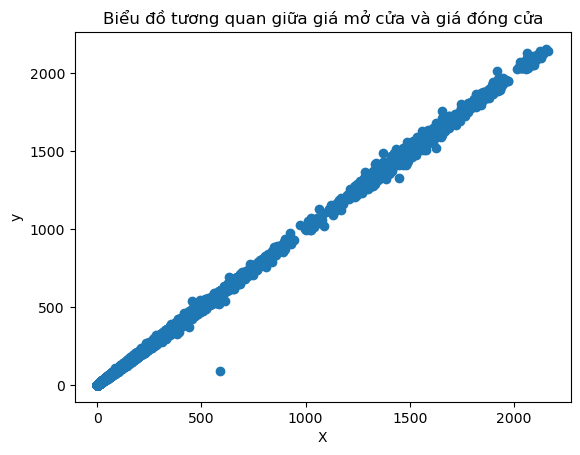

In [9]:
X=data.iloc[:,1]
y=data.iloc[:, 4]
correlation = X.corr(y)
print("\t",'độ Tương quang của X và y là:', correlation)

# print(y)
# # X và y là hai vector chứa dữ liệu
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Biểu đồ tương quan giữa giá mở cửa và giá đóng cửa')
plt.show()


Hệ số tương quan rất gần với 1, điều này cho thấy mức độ tương quan tuyến tính mạnh mẽ giữa biến X và biến y. Nói cách khác, biến X và biến y di chuyển cùng phương và có mối quan hệ rất chặt chẽ với nhau. Khi giá trị của biến X tăng, giá trị của biến y cũng tăng theo một cách đồng đều.

Mối liên hệ giữa cột "Open" (Giá mở cửa) và cột "Close" (Giá đóng cửa) thường được sử dụng để đo lường sự biến động của giá cổ phiếu trong một ngày giao dịch. Nếu giá đóng cửa thấp hơn giá mở cửa, điều này có thể cho thấy sự suy giảm trong giá cổ phiếu trong ngày đó. Ngược lại, nếu giá đóng cửa cao hơn giá mở cửa, có thể có dấu hiệu tăng trưởng trong giá cổ phiếu. Mối liên hệ giữa hai cột này cung cấp thông tin quan trọng về xu hướng và biến động của giá cổ phiếu trong thời gian ngắn.

**Vector X (biến độc lập) bao gồm các cột sau:**

Date: Ngày của dữ liệu giá cổ phiếu.

Open: Giá mở cửa của cổ phiếu vào ngày đó.

High: Giá cao nhất đạt được trong ngày giao dịch.

Low: Giá thấp nhất đạt được trong ngày giao dịch.

Volume: Thể tích giao dịch, tức là số lượng cổ phiếu được giao dịch vào ngày đó.

Dividends: Cổ tức được trả vào ngày đó (nếu có).

Stock Splits: Thông tin về chia cổ phiếu (nếu có).

**Vector y (biến phụ thuộc)là:**

Close: Giá đóng cửa của cổ phiếu vào ngày đó.

In [5]:
def readdata(file):
    data = pd.read_csv(file)
    del data['Date']
    data = data.iloc[:, :-5]
    data = np.array(data)
    return data

# Hàm chuẩn hóa dữ liệu và tạo training set và test set
def create_data(data):
    data = preprocessing.MinMaxScaler().fit_transform(data)
    X1=data[:,:3]
    X2=data[:,4]
    X = np.column_stack((X1, X2))
    y=data[:,3]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test
def linear_loss(X, y, w):
      m = X.shape[0]
      y_pred = np.dot(X, w)
      J = 1/(2*m) * np.sum((y_pred - y)**2)
      return J

# II. Chọn 2 phương pháp Gradient Descent (GD), Momentum Based GD tối ưu để tối ưu hoá loss function

## 2.1 Gradient Descent (GD)

Công thức của thuật toán gradient descent, một phương pháp tối ưu hóa thông dụng trong máy học và tối ưu hóa, được biểu diễn như sau:

θ = θ - α * ∇J(θ)

**Trong đó:**

θ là vectơ tham số cần tối ưu hóa.

α là tốc độ học (learning rate), quyết định sự điều chỉnh của vectơ tham số trong mỗi bước cập nhật.

J(θ) là hàm mục tiêu cần tối ưu hóa.

∇J(θ) là đạo hàm của hàm mục tiêu theo vectơ tham số θ.

**Thuật toán gradient descent cố gắng điều chỉnh các tham số θ một cách dần dần dựa trên hướng và độ lớn của đạo hàm để tìm ra điểm tối ưu của hàm mục tiêu J(θ).**

In [6]:
def gradient_descent(X, y, w, learning_rate, iterations):
    m = X.shape[0]
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        y_pred = np.dot(X, w)
        w = w - (learning_rate/m) * (X.T.dot(y_pred - y))
        cost = linear_loss(X, y, w)
        cost_history[i] = cost
    return w, cost_history

## 2.2 Momentum Based GD

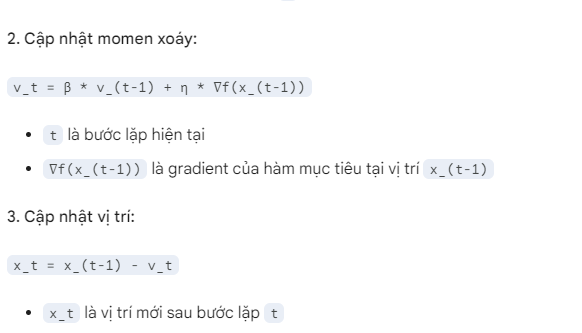

updatet = γ · updatet−1 + η∇wt

wt+1 = wt − updatet

In [7]:
def momentum_based_gradient_descent(X, y, w, learning_rate, iterations, gamma):
    m = X.shape[0]
    cost_history = np.zeros(iterations)
    v = np.zeros(X.shape[1])  # Khởi tạo véc tơ momentum ban đầu
    for i in range(iterations):
        y_pred = np.dot(X, w)
        gradient = (1/m) * np.dot(X.T, (y_pred - y))  # Tính gradient
        v = gamma*v + learning_rate * gradient  # Cập nhật giá trị momentum
        w = w - v  # Cập nhật trọng số
        cost = linear_loss(X, y, w)
        cost_history[i] = cost
    return w, cost_history

# III. Đồ thì biểu diễn hàm mất mất giảm giẩn qua vòng lặp

In [8]:
def plot_performance(cost_history,text):
    plt.plot(range(1, len(cost_history) + 1), cost_history, color='blue')
    plt.rcParams["figure.figsize"] = (10,6)
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(text)
    plt.show()

# IV.Hiệu suất mô hình

In [9]:

def evaluate_performance(X_test, y_test, w):
    # Tính toán dự đoán trên tập test
    y_pred = np.dot(X_test, w)

    # Tính toán Mean Squared Error (MSE)
    n = len(y_test)
    mse = (1/n) * sum((y_test[i] - y_pred[i])**2 for i in range(n))

    # Tính toán Rmse
    rmse = np.sqrt(mse)
    
    # Tính giá trị trung bình của y_test
    y_mean = sum(y_test) / len(y_test)
    # Tính tổng bình phương của các sai số (residual)
    residuals_sum = sum((y_test[i] - y_pred[i])**2 for i in range(len(y_test)))
    # Tính tổng bình phương của độ biến thiên của dữ liệu
    total_sum_of_squares = sum((yi - y_mean)**2 for yi in y_test)
    # Tính R2 score
    r2 = 1 - (residuals_sum / total_sum_of_squares)
    # Trả về kết quả hiệu suất của mô hình
    return mse, rmse,r2

# V.kiểm nghiệm trên dữ liệu mới

đây là vector y kiểm thử [0.03399817 0.2279196  0.01191413 ... 0.01699825 0.01218188 0.01093082]

 	 Gradient Desent để tối ưu hàm loss 

gia tri hàm mất mát sử dụng Gradient Desent để tối ưu : 0.00027236752596338247
Vector y dự đoán khi sử dụng Gradient Desent là:  [0.04637051 0.30197455 0.01741143 ... 0.02342587 0.01629593 0.01495931] 

Mean squart error Gradient Desent : 0.0005447350519267666
Root Mean squart error Gradient Desent : 0.023339559805762546
R2 Score Gradient Desent: 0.8087778068810296

 	 momentum based Gradient Desent để tối ưu hàm loss 

Giá trị tối ưu của mất mát sử dụng momentum based Gradient Desent là: 3.338340460384043e-05
Vector y dự đoán kh sử dụng momentum based Gradient Desent là:  [0.03561255 0.23174493 0.01352463 ... 0.0180503  0.01250421 0.01157045] 

Mean squart error momentum based Gradient Desent : 6.676680920768073e-05
Root Mean squart error momentum based Gradient Desent : 0.008171095961233152
R2 Score Gradient Desent momentum based Gradient Desent: 0

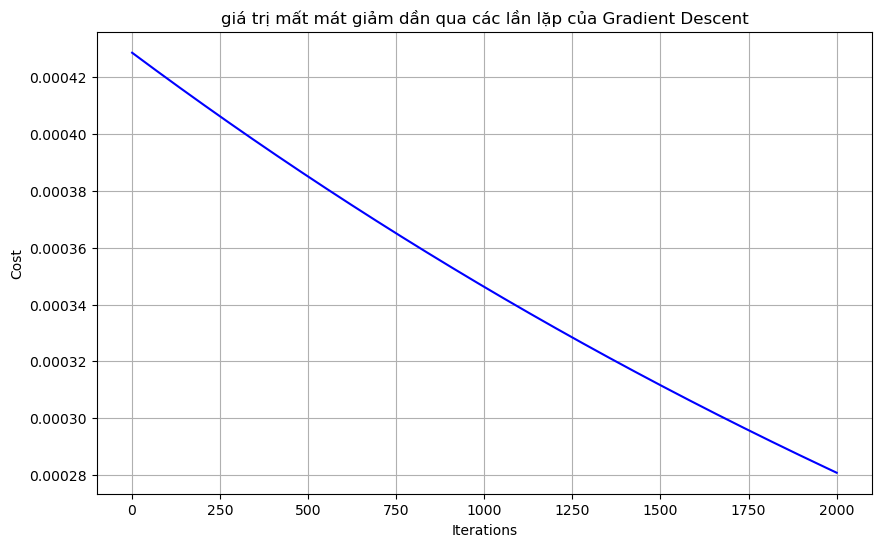

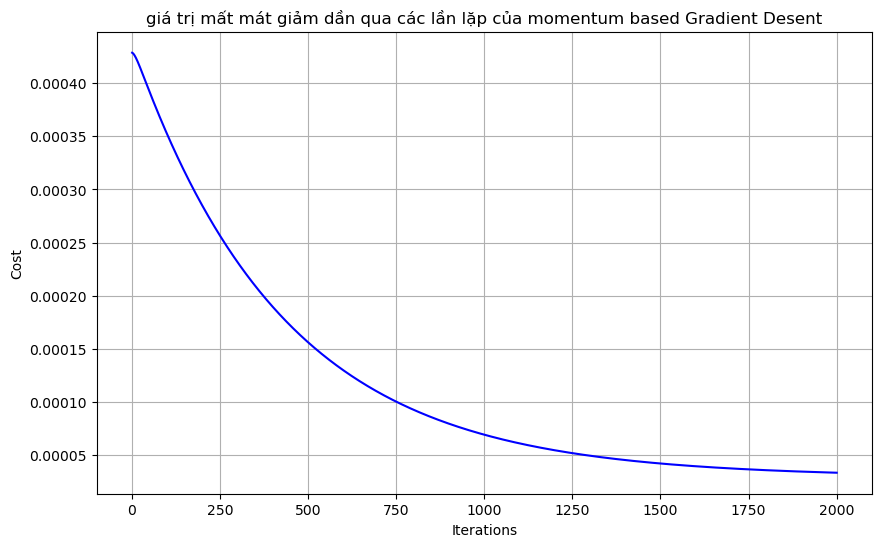

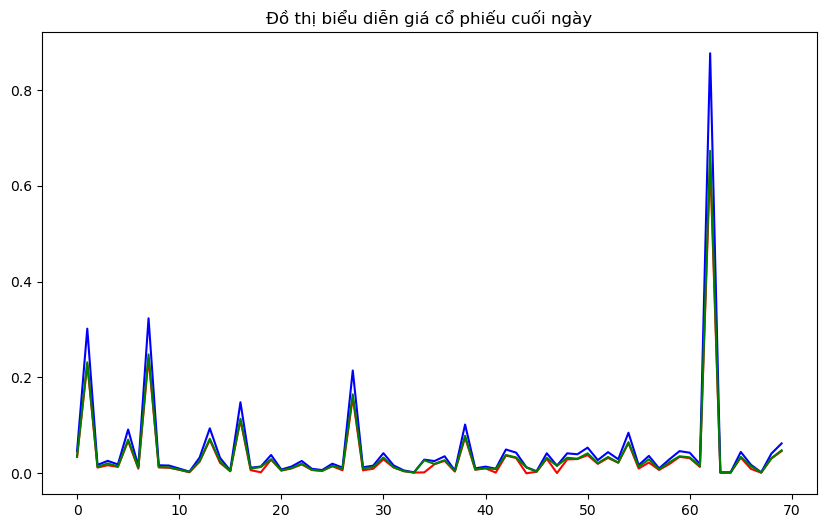

In [45]:
def main():
    data = readdata('C:/Users/vcd09/Downloads/New folder (2)/World-Stock-Prices-Dataset.csv')
    X_train, X_test, y_train, y_test = create_data(data)
    print('đây là vector y kiểm thử',y_test)
    initial_w = np.random.rand(X_train.shape[1])
    learning_rate = 0.01
    iterations = 2000
    gamma = 0.9  # Hệ số động lượng
    print('\n','\t','Gradient Desent để tối ưu hàm loss','\n')
    final_w, cost_history_GD = gradient_descent(X_train, y_train, initial_w, learning_rate, iterations)
    final_cost = linear_loss(X_test, y_test, final_w)
    print('gia tri hàm mất mát sử dụng Gradient Desent để tối ưu :',final_cost)
    
    y_hat_GD = np.dot(X_test, final_w)
    print("Vector y dự đoán khi sử dụng Gradient Desent là: ", y_hat_GD,'\n')
    mse, rmse,r2=evaluate_performance(X_test, y_test, final_w)
    print('Mean squart error Gradient Desent :' ,mse)
    print('Root Mean squart error Gradient Desent :',rmse)
    print('R2 Score Gradient Desent:',r2)
    
    print('\n','\t','momentum based Gradient Desent để tối ưu hàm loss','\n')
    final_w, cost_history_mbGD = momentum_based_gradient_descent(X_train, y_train, initial_w, learning_rate, 2000, gamma)
    final_cost = linear_loss(X_test, y_test, final_w)
    y_hat_MBGD = np.dot(X_test, final_w)
    print("Giá trị tối ưu của mất mát sử dụng momentum based Gradient Desent là:", final_cost)
    print("Vector y dự đoán kh sử dụng momentum based Gradient Desent là: ", y_hat_MBGD,'\n')
    mse, rmse,r2=evaluate_performance(X_test, y_test, final_w)
    print('Mean squart error momentum based Gradient Desent :' ,mse)
    print('Root Mean squart error momentum based Gradient Desent :',rmse)
    print('R2 Score Gradient Desent momentum based Gradient Desent:',r2)
    
    
    plot_performance(cost_history_GD,'giá trị mất mát giảm dần qua các lần lặp của Gradient Descent')
    
    plot_performance(cost_history_mbGD,'giá trị mất mát giảm dần qua các lần lặp của momentum based Gradient Desent')
    x=[]
    for a in range(70):
        x.append(a)
    # Tạo một subplot đơn
    fig, ax = plt.subplots()
    ax.plot(x, y_test[:70],'r')
    ax.plot(x, y_hat_GD[:70],'b')
    ax.plot(x, y_hat_MBGD[:70],'g')

    ax.set_title('Đồ thị biểu diễn giá cổ phiếu cuối ngày')
    plt.show()





if __name__ == "__main__":
    main()